# Create the final pipeline 

we will create a pipeline that group all the steps we have done so far.

## outline:

- [**01. Importing libraries**](#01)
- [**02. Load DataSet**](#02)
- [**03. Split Data**](#03)
- [**04. Configuration**](#04)
- [**05. Create the pipeline**](#05)
- [**06. Score new Data**](#06)

---

<a id="01"></a>

### **01. Importing libraries** 


---



In [1]:
# data manipulation 
import pandas as pd 
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
# saving the pipeline 
import joblib

# from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

# from feature-engine 

# for Handling Missing Data
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

# for Converting Categorical Data
from feature_engine.encoding import (
    RareLabelEncoder, # Useful for preventing overfitting
    OrdinalEncoder,
)


# for stabilizing variance and making the data more Gaussian-like.
from feature_engine.transformation import(
    LogTransformer,
    YeoJohnsonTransformer,
)

from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

from sklearn.base import BaseEstimator, TransformerMixin

pd.pandas.set_option('display.max_columns', None)

import warnings 
warnings.filterwarnings('ignore')

---

<a id="02"></a>

### **02. Load Data** 


---



In [2]:
data = pd.read_csv('../Data/train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

---

<a id="03"></a>

### **03. Split The data** 


---



It is important to separate our data intro training and testing set.

When we engineer features, some techniques learn parameters from data. It is important to learn these parameters only from the train set. This is to avoid over-fitting.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.1,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1314, 79), (146, 79), (1314,), (146,))

---

<a id="04"></a>

### **04. Config** 


---


In [5]:
features = pd.read_csv('..\Data\SelectedFeatures\selected_features.csv')
features = features['0'].tolist()

In [6]:
len(features)

40

In [7]:
# categorical variables with NA in train set

# small number of missing values
CATEGORICAL_VARS_WITH_NA_FREQUENT = ['BsmtQual',
                                     'BsmtCond',
                                     'BsmtExposure',
                                     'BsmtFinType1',
                                     'BsmtFinType2',
                                     'Electrical',
                                     'GarageType',
                                     'GarageFinish',
                                     'GarageQual',
                                     'GarageCond']

# huge number of missing values
CATEGORICAL_VARS_WITH_NA_MISSING = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

# numerical variables with NA in train set
NUMERICAL_VARS_WITH_NA = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

TEMPORAL_VARS = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

REF_VAR = "YrSold"

# variables to log transform
NUMERICALS_LOG_VARS = ["LotFrontage", "1stFlrSF", "GrLivArea"]

NUMERICALS_YEO_VARS = ['LotArea']


BINARIZE_VARS = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

# variables to map
QUAL_VARS = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
             ]

EXPOSURE_VARS = ['BsmtExposure']

FINISH_VARS = ['BsmtFinType1', 'BsmtFinType2']

GARAGE_VARS = ['GarageFinish']

FENCE_VARS = ['Fence']

# categorical variables to encode
CATEGORICAL_VARS = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition']

QUAL_MAPPINGS = {'Po': 1, 'Fa': 2, 'TA': 3,
                 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

EXPOSURE_MAPPINGS = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

FINISH_MAPPINGS = {'Missing': 0, 'NA': 0, 'Unf': 1,
                   'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

GARAGE_MAPPINGS = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

FENCE_MAPPINGS = {'Missing': 0, 'NA': 0,
                  'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

In [8]:
# final configs

# now we need to pick the columns that we selected 

# categorical variables with NA in train set

CATEGORICAL_VARS_WITH_NA_FREQUENT = [col for col in CATEGORICAL_VARS_WITH_NA_FREQUENT if col in features] # 5 col

CATEGORICAL_VARS_WITH_NA_MISSING = [col for col in CATEGORICAL_VARS_WITH_NA_MISSING if col in features] # 0 col

NUMERICAL_VARS_WITH_NA = [col for col in NUMERICAL_VARS_WITH_NA if col in features] # 1 col

TEMPORAL_VARS = [col for col in TEMPORAL_VARS if col in features] # 2 col

REF_VAR = "YrSold" # we need to add it to the data at the end

# this variable is to calculate the temporal variable,
# can be dropped afterwards
DROP_FEATURES = ["YrSold"]

# variables to log transform
NUMERICALS_LOG_VARS = [col for col in NUMERICALS_LOG_VARS if col in features] # 2 col

# variables to binarize
BINARIZE_VARS = [col for col in BINARIZE_VARS if col in features] # 1 col

# variables to map
QUAL_VARS = [col for col in QUAL_VARS if col in features] # 9 col

EXPOSURE_VARS = [col for col in EXPOSURE_VARS if col in features] # 1 col

FINISH_VARS = [col for col in FINISH_VARS if col in features] # 2 col

GARAGE_VARS = [col for col in GARAGE_VARS if col in features] # 1 col

FENCE_VARS = [col for col in FENCE_VARS if col in features] # 0 col

# categorical variables to encode
CATEGORICAL_VARS = [col for col in CATEGORICAL_VARS if col in features] # 30 col


# variable mappings
QUAL_MAPPINGS = {'Po': 1, 'Fa': 2, 'TA': 3,
                 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

EXPOSURE_MAPPINGS = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

FINISH_MAPPINGS = {'Missing': 0, 'NA': 0, 'Unf': 1,
                   'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

GARAGE_MAPPINGS = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}


FEATURES = features + ['YrSold']

In [41]:
print(list(CATEGORICAL_VARS))

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Foundation', 'CentralAir', 'Functional', 'PavedDrive', 'SaleCondition']


In [9]:
X_train = X_train[FEATURES]
X_test = X_test[FEATURES]

X_train.shape, X_test.shape

((1314, 41), (146, 41))

In [10]:
for col in CATEGORICAL_VARS:
    X_train[col] = X_train[col].astype('category')

In [11]:
class TemporalVariableTransformer(BaseEstimator, TransformerMixin):
	# Temporal elapsed time transformer

    def __init__(self, variables, reference_variable):
        
        if not isinstance(variables, list):
            raise ValueError('variables should be a list')
        
        self.variables = variables
        self.reference_variable = reference_variable

    def fit(self, X, y=None):
        # we need this step to fit the sklearn pipeline
        return self

    def transform(self, X):

    	# so that we do not over-write the original dataframe
        X = X.copy()
        
        for feature in self.variables:
            X[feature] = X[self.reference_variable] - X[feature]

        return X



# categorical missing value imputer
class Mapper(BaseEstimator, TransformerMixin):

    def __init__(self, variables, mappings):

        if not isinstance(variables, list):
            raise ValueError('variables should be a list')

        self.variables = variables
        self.mappings = mappings

    def fit(self, X, y=None):
        # we need the fit statement to accomodate the sklearn pipeline
        return self

    def transform(self, X):
        X = X.copy()
        for feature in self.variables:
            X[feature] = X[feature].map(self.mappings)

        return X

---

<a id="05"></a>

### **05. Create the pipeline** 


---


In [12]:
price_pipeline = Pipeline([
    ## ____Imputation___
    # ('missing_imputation',
    #  CategoricalImputer(
    #      imputation_method='missing',
    #      variables=CATEGORICAL_VARS_WITH_NA_MISSING,
    # )),   #==== 0 have 0 col
    
    ('frequent_imputation',
     CategoricalImputer(
         imputation_method='frequent',
         variables=CATEGORICAL_VARS_WITH_NA_FREQUENT
     )),
    
    ('missing_indicator',
     AddMissingIndicator(
         variables = NUMERICAL_VARS_WITH_NA
     )),
    
    ('mean_imputation',
     MeanMedianImputer(
         imputation_method='mean',
         variables=NUMERICAL_VARS_WITH_NA
     )),
    
   
    # == TEMPORAL VARIABLES ====
    ('elapsed_time', TemporalVariableTransformer(
        variables=TEMPORAL_VARS, reference_variable=REF_VAR)),

    ('drop_features', DropFeatures(features_to_drop=[REF_VAR])),

    # ==== VARIABLE TRANSFORMATION =====
    ('log', LogTransformer(variables=NUMERICALS_LOG_VARS)),
    
    ('yeojohnson', YeoJohnsonTransformer(variables=NUMERICALS_YEO_VARS)),
    
    ('binarizer', SklearnTransformerWrapper(
        transformer=Binarizer(threshold=0), variables=BINARIZE_VARS)),
    

    # === mappers ===
    ('mapper_qual', Mapper(
        variables=QUAL_VARS, mappings=QUAL_MAPPINGS)),

    ('mapper_exposure', Mapper(
        variables=EXPOSURE_VARS, mappings=EXPOSURE_MAPPINGS)),

    ('mapper_finish', Mapper(
        variables=FINISH_VARS, mappings=FINISH_MAPPINGS)),

    ('mapper_garage', Mapper(
        variables=GARAGE_VARS, mappings=GARAGE_MAPPINGS)),
    
    # ('mapper_fence', Mapper(
    #     variables=FENCE_VARS, mappings=FENCE_MAPPINGS)), #we delete it because it is not important


    # == CATEGORICAL ENCODING
    ('rare_label_encoder', RareLabelEncoder(
        tol=0.01, n_categories=1, variables=CATEGORICAL_VARS
    )),

    # encode categorical and discrete variables using the target mean
    ('categorical_encoder', OrdinalEncoder(
        encoding_method='ordered', variables=CATEGORICAL_VARS)),
    ('scaler', MinMaxScaler()),
    ('Lasso', Lasso(alpha=0.001, random_state=42)),

])

In [13]:
# train the pipeline
price_pipeline.fit(X_train, y_train)

Pipeline(steps=[('frequent_imputation',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['BsmtQual', 'BsmtCond',
                                               'BsmtExposure', 'BsmtFinType1',
                                               'GarageFinish'])),
                ('missing_indicator',
                 AddMissingIndicator(variables=['GarageYrBlt'])),
                ('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['GarageYrBlt'])),
                ('elapsed_time',
                 Tempora...
                                             'Functional', 'PavedDrive',
                                             'SaleCondition'])),
                ('categorical_encoder',
                 OrdinalEncoder(variables=['MSSubClass', 'MSZoning', 'LotShape',
                                           'LandContour', 'LotConfig',
                                           'Neighborhood', 'Condition1',
                                           'HouseStyle', 'RoofStyle',
                                           'Exterior1st', 'Foundation',
                                           'CentralAir', 'Functional',
                                           'PavedDrive', 'SaleCondition'])),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.001, random_state=42))])

In [14]:
# evaluate the model:
# ====================

# make predictions for train set
pred = price_pipeline.predict(X_train)
# mse, rmse and r2 score
print(f"train mse: {int(mean_squared_error(y_train,pred))}")
print(f"train rmse: {int(mean_squared_error(y_train, pred, squared=False))}")
print(f"train r2: {r2_score(y_train, pred)}")
print()

# make predictions for test set
pred = price_pipeline.predict(X_test)

# mse, rmse and r2 score
print(f"train mse: {int(mean_squared_error(y_test,pred))}")
print(f"train rmse: {int(mean_squared_error(y_test, pred, squared=False))}")
print(f"train r2: {r2_score(y_test, pred)}")
print()

print()


train mse: 993404778
train rmse: 31518
train r2: 0.8342085004832642

train mse: 1779318754
train rmse: 42181
train r2: 0.8052545801538058




Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

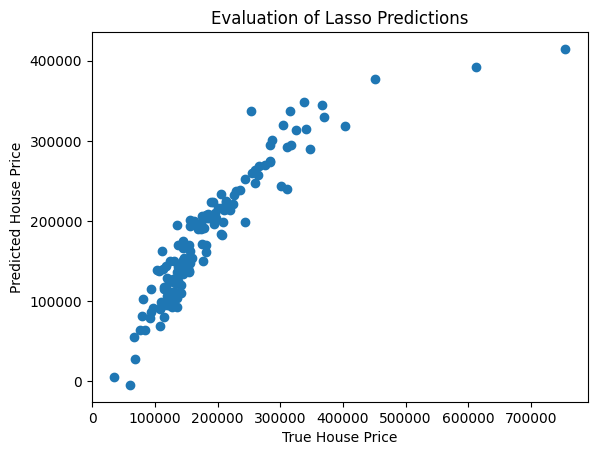

In [15]:
# let's evaluate our predictions respect to the real sale price

plt.scatter(y_test, price_pipeline.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [16]:
# save the pipeline 

joblib.dump(price_pipeline, 'pipeline.joblib')

['pipeline.joblib']

---

<a id="06"></a>

### **06. Score new Data** 


---


In [17]:
# load the test data 
test_data = pd.read_csv('../Data/test.csv')

In [18]:
test_data = test_data.drop(columns=['Id'],axis=1)
data['MSSubClass'] = data['MSSubClass'].astype('O')
test_data = test_data[FEATURES]
for col in CATEGORICAL_VARS:
    test_data[col] = test_data[col].astype('category')

In [19]:
test_data.shape

(1459, 41)

In [20]:
new_vars_with_na = [
    var for var in FEATURES
    if var not in CATEGORICAL_VARS_WITH_NA_FREQUENT +
    CATEGORICAL_VARS_WITH_NA_MISSING +
    NUMERICAL_VARS_WITH_NA
    and test_data[var].isnull().sum() > 0]

new_vars_with_na

['MSZoning',
 'Exterior1st',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'BsmtFullBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea']

In [21]:
test_data[new_vars_with_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSZoning      1455 non-null   category
 1   Exterior1st   1458 non-null   category
 2   BsmtFinSF1    1458 non-null   float64 
 3   BsmtUnfSF     1458 non-null   float64 
 4   BsmtFullBath  1457 non-null   float64 
 5   KitchenQual   1458 non-null   object  
 6   Functional    1457 non-null   category
 7   GarageCars    1458 non-null   float64 
 8   GarageArea    1458 non-null   float64 
dtypes: category(3), float64(5), object(1)
memory usage: 74.0+ KB


In [22]:
cat_var = [col for col in new_vars_with_na if test_data[col].dtype == 'O' or test_data[col].dtype =='category']
num_var = [col for col in new_vars_with_na if col not in cat_var]

In [23]:
for col in new_vars_with_na:
    if col in num_var:
        test_data[col] = test_data[col].fillna(test_data[col].mean())
    elif col in cat_var:
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [24]:
test_data[new_vars_with_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSZoning      1459 non-null   category
 1   Exterior1st   1459 non-null   category
 2   BsmtFinSF1    1459 non-null   float64 
 3   BsmtUnfSF     1459 non-null   float64 
 4   BsmtFullBath  1459 non-null   float64 
 5   KitchenQual   1459 non-null   object  
 6   Functional    1459 non-null   category
 7   GarageCars    1459 non-null   float64 
 8   GarageArea    1459 non-null   float64 
dtypes: category(3), float64(5), object(1)
memory usage: 74.0+ KB


In [25]:
# make predictions for test set
pred = price_pipeline.predict(test_data)

In [26]:
pred

array([132130.24436112, 179833.40552366, 179166.56711976, ...,
       166525.03441256, 140223.78882534, 218088.66061442])

<Axes: >

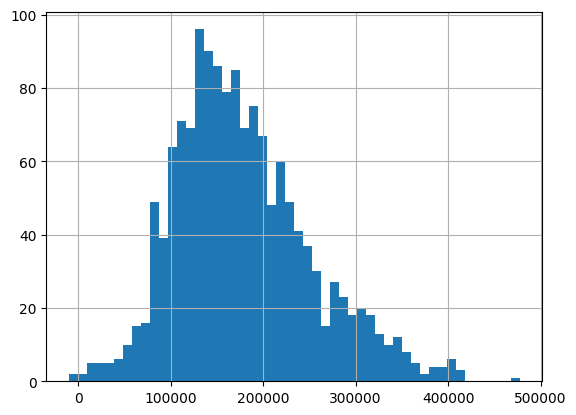

In [27]:
# let's plot the predicted sale prices
pd.Series(pred).hist(bins=50)